In [55]:
!pip install gitpython

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [56]:
!pip install sentence-transformers  

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [57]:
import os
from git import Repo
import os
import json
import glob

## Lets point at a github repo that has a jupyterbook in it

In [58]:

# Define the GitHub repository URL and the local path to clone it to
repo_url = "https://github.com/data-88e/textbook.git"  # Clone the entire repository
local_path = "./jupyterbook"

# Clone the repository
if not os.path.exists(local_path):
    Repo.clone_from(repo_url, local_path)

# Define the path to the specific folder you're interested in
content_path = os.path.join(local_path, 'docs', '_sources', 'content')

# Check if the specific folder exists and print its contents
if os.path.exists(content_path):
    print(f"Contents of {content_path}:")
    print(os.listdir(content_path))
else:
    print(f"Path {content_path} does not exist.")


Contents of ./jupyterbook/docs/_sources/content:
['09-macro', '07-game-theory', '12-environmental', '04-production', '03-public', 'references.md', '05-utility', '02-supply', '08-development', '10-finance', 'intro.md', '11-econometrics', '06-inequality', '00-intro', 'LICENSE.md', '01-demand']


In [59]:

# Function to extract content from .ipynb files by parsing them as JSON
def extract_notebook_content_as_json(ipynb_file):
    try:
        with open(ipynb_file, 'r', encoding='utf-8') as f:
            notebook_content = json.load(f)  # Load the ipynb file as a JSON object
    except Exception as e:
        print(f"Error reading {ipynb_file}: {e}")
        return None, None

    # Ensure the notebook has cells
    if 'cells' not in notebook_content:
        print(f"No cells found in {ipynb_file}")
        return None, None

    # Helper function to join cell source content
    def join_source(cell):
        if isinstance(cell.get('source'), list):
            return ''.join(cell['source'])  # Join list elements into a single string
        return cell.get('source', '')

    # Extract content from markdown cells
    markdown_cells = [
        join_source(cell) for cell in notebook_content['cells'] if cell.get('cell_type') == 'markdown'
    ]

    # Optionally, you could also extract code cells if needed
    code_cells = [
        join_source(cell) for cell in notebook_content['cells'] if cell.get('cell_type') == 'code'
    ]
    
    # Combine the markdown cells into one text block (or return them separately)
    return '\n'.join(markdown_cells), '\n'.join(code_cells)

# Directory where the cloned JupyterBook files are stored
local_path = "./jupyterbook"

# Gather all the Jupyter notebook (.ipynb) files
ipynb_files = glob.glob(os.path.join(local_path, '**', '*.ipynb'), recursive=True)

# Extract text from all notebook files
markdown_content = []
code_content = []

for file in ipynb_files:
    markdown_text, code_text = extract_notebook_content_as_json(file)
    if markdown_text and code_text:  # Ensure that valid content was returned
        markdown_content.append(markdown_text)
        code_content.append(code_text)

# Now `markdown_content` contains all the markdown content from the notebooks
# and `code_content` contains all the code.

print(f"Extracted {len(markdown_content)} markdown files and {len(code_content)} code files.")




Extracted 211 markdown files and 211 code files.


In [60]:
# Inspect a few entries from the extracted markdown and code content
print("First markdown entry:")
print(markdown_content[0] if markdown_content else "No markdown content found.")

print("\nFirst code entry:")
print(code_content[0] if code_content else "No code content found.")


First markdown entry:
# Equilibria & Oligopolies

This section introduces the concept of equilibria in games, the paradigm of the prisoner's dilemma, and oligopolies. These concepts are essential to understanding the models we will be studying the next sections, and for relating game theory to its economic applications.
## Equilibrium

The [prisoner's dilemma](https://en.wikipedia.org/wiki/Prisoner%27s_dilemma) is a classic game first discussed by Merrill Flood and Melvin Dresher in 1950. In this game, there are two prisoners who have been captured and are being interrogated. The prisoners cannot contact each other in any way. They have two options: they can **defect** (betray the other prisoner to the police) or they can **cooperate** (maintain their silence). If both defect, both receive 4 years in prison. If one defects and the other does not, the defector goes free and the cooperator receives 5 years in prison. If both cooperate (meaning neither talks to the police), then they each

In [61]:
from sentence_transformers import SentenceTransformer

# Initialize the model (you can choose a different transformer if needed)
model = SentenceTransformer('all-MiniLM-L6-v2')

# Vectorize the extracted markdown content
markdown_embeddings = model.encode(markdown_content)

# (Optionally) Vectorize the code content if you want to answer code-related questions
code_embeddings = model.encode(code_content)


In [62]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np


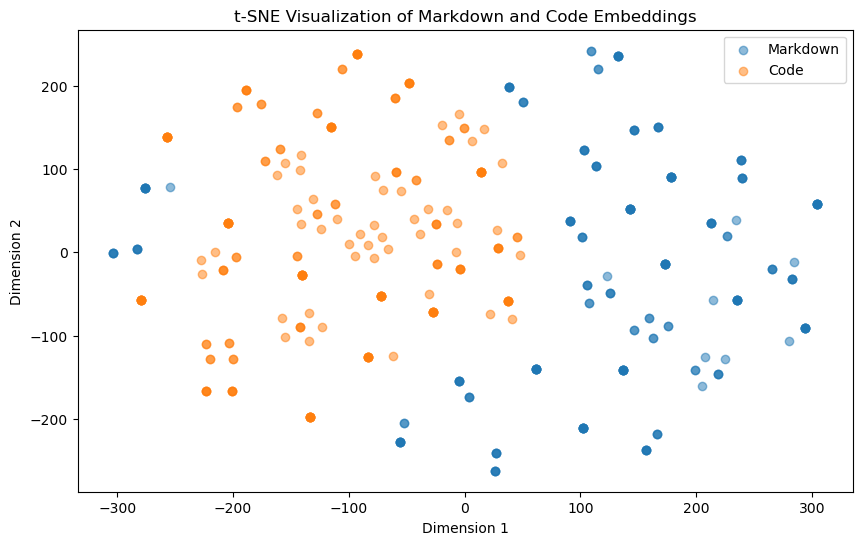

In [63]:

# Combine markdown and code embeddings
combined_embeddings = np.concatenate((markdown_embeddings, code_embeddings), axis=0)

# Apply t-SNE to reduce dimensions to 2D
tsne = TSNE(n_components=2, random_state=42)
reduced_embeddings = tsne.fit_transform(combined_embeddings)

# Split the reduced embeddings back into markdown and code
markdown_reduced = reduced_embeddings[:len(markdown_embeddings)]
code_reduced = reduced_embeddings[len(markdown_embeddings):]

# Plot the embeddings
plt.figure(figsize=(10, 6))
plt.scatter(markdown_reduced[:, 0], markdown_reduced[:, 1], label='Markdown', alpha=0.5)
plt.scatter(code_reduced[:, 0], code_reduced[:, 1], label='Code', alpha=0.5)
plt.legend()
plt.title('t-SNE Visualization of Markdown and Code Embeddings')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

In [64]:
# Install necessary libraries
!pip install matplotlib scikit-learn plotly

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [65]:
# Import libraries
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np
import plotly.express as px

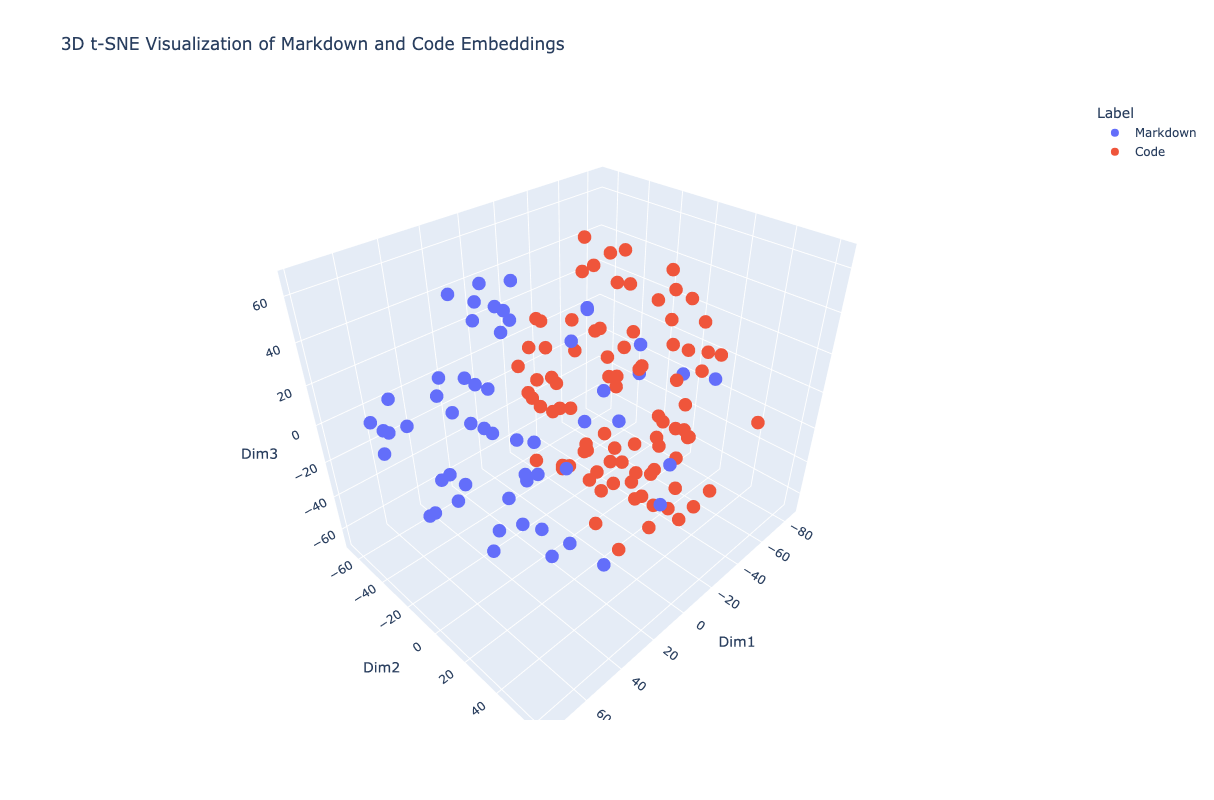

In [66]:
# Apply t-SNE to reduce dimensions to 3D
tsne = TSNE(n_components=3, random_state=42)
reduced_embeddings = tsne.fit_transform(combined_embeddings)

# Split the reduced embeddings back into markdown and code
markdown_reduced = reduced_embeddings[:len(markdown_embeddings)]
code_reduced = reduced_embeddings[len(markdown_embeddings):]

# Create labels for the embeddings
labels = ['Markdown'] * len(markdown_embeddings) + ['Code'] * len(code_embeddings)

# Create a DataFrame for Plotly
import pandas as pd
df = pd.DataFrame(reduced_embeddings, columns=['Dim1', 'Dim2', 'Dim3'])
df['Label'] = labels

# Plot the embeddings using Plotly
fig = px.scatter_3d(df, x='Dim1', y='Dim2', z='Dim3', color='Label', title='3D t-SNE Visualization of Markdown and Code Embeddings', height=800)
fig.show()

In [67]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
# Step 2: Initialize the NearestNeighbors model
n_neighbors = 5  # Number of nearest neighbors to retrieve
nbrs = NearestNeighbors(n_neighbors=n_neighbors, metric='cosine')  # You can also use 'euclidean'
nbrs.fit(markdown_embeddings)  # Fit the model with the embeddings


NearestNeighbors(metric='cosine')

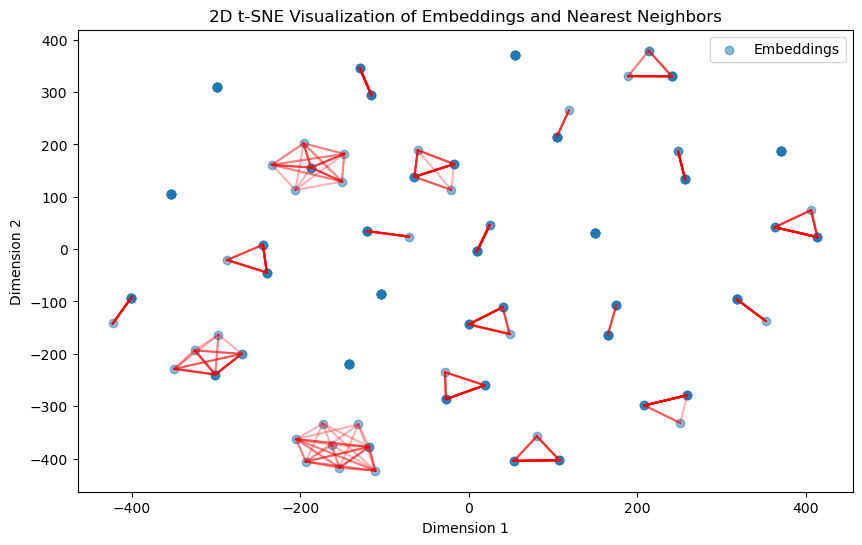

In [68]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Apply t-SNE to reduce dimensions to 2D
tsne = TSNE(n_components=2, random_state=42)
reduced_embeddings = tsne.fit_transform(markdown_embeddings)

# Find the nearest neighbors for each embedding
distances, indices = nbrs.kneighbors(markdown_embeddings)

# Plot the embeddings and their nearest neighbors
plt.figure(figsize=(10, 6))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], label='Embeddings', alpha=0.5)

for i in range(len(markdown_embeddings)):
    for neighbor in indices[i]:
        plt.plot([reduced_embeddings[i, 0], reduced_embeddings[neighbor, 0]],
                 [reduced_embeddings[i, 1], reduced_embeddings[neighbor, 1]], 'r-', alpha=0.3)

plt.title('2D t-SNE Visualization of Embeddings and Nearest Neighbors')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

In [69]:
!pip install seaborn

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [70]:
# Step 3: Function to query the model with a user query
def query_model(query):
    # Generate an embedding for the query
    query_embedding = model.encode([query])

    # Search for the nearest neighbors
    distances, indices = nbrs.kneighbors(query_embedding)

    # Retrieve the nearest markdown content based on indices
    closest_texts = [markdown_content[i] for i in indices[0]]

    # Print the results
    for i, text in enumerate(closest_texts):
        print(f"Result {i+1}: {text}\n")


In [71]:
# Example query
query_model("What is the supply and demand equilibrium?")

Result 1: # Market Equilibria

We will now explore the relationship between price and quantity of oranges produced between 1924 and 1938. Since the data {cite}`01demand-fruits` is from the 1920s and 1930s, it is important to remember that the prices are much lower than what they would be today because of inflation, competition, innovations, and other factors. For example, in 1924, a ton of oranges would have costed \$6.63; that same amount in 2019 is \$100.78. 
## Finding the Equilibrium

An important concept in econmics is the market equilibrium. This is the point at which the demand and supply curves meet and represents the "optimal" level of production and price in that market.
```{admonition} Definition
The **market equilibrium** is the price and quantity at which the demand and supply curves intersect. The price and resulting transaction quantity at the equilibrium is what we would predict to observe in the market.
```
Let's walk through how to the market equilibrium using the mar

$$
\begin{align*}
    \pi_2 = -1.89q_2^2-1.89q_1q_2+148.89q_2 - cq_2
\end{align*}
$$

Now we will take the partial derivative to find the best response functions for both players. For firm 1 this looks like:

$$
\begin{align*}
    \frac{\partial{\pi_1}}{\partial{q_1}}= -3.78q_1 - 1.89q_2+148.89 - 100 = 0\\
    q_1 = \frac{48.89-1.89q_2}{3.78}
\end{align*}
\
$$

For firm 2 this looks like:

$$
\begin{align*}
    \frac{\partial{\pi_2}}{\partial{q_2}}= -3.78q_2 - 1.89q_1+148.89 - 100 = 0\\
    q_2 = \frac{48.89-1.89q_1}{3.78}
\end{align*}
$$

Now while you can solve this algebraically, it takes much longer and leaves a lot of room for error, so as data scientists we will use Python to solve this problem.

## These chunks are too big!  Lets refine this to work on sentences instead of markdown cells generall1y


In [72]:
!pip install nltk


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [73]:
import nltk
nltk.download('punkt_tab')  # Download the tokenizer models
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

# check version of nltk
print(nltk.__version__)

# Split the text into sentences
def split_into_sentences(text):
    return sent_tokenize(text)



3.9.1


[nltk_data] Downloading package punkt_tab to /home/jovyan/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [74]:
nltk.word_tokenize('My beautiful house is Awesome. My car is too.', language='english', preserve_line=True)


['My', 'beautiful', 'house', 'is', 'Awesome.', 'My', 'car', 'is', 'too', '.']

In [75]:
# Example text
text = "The concept of supply and demand is fundamental in economics. It drives market behavior."

# Tokenize the text into sentences
words = nltk.word_tokenize(text, language='english', preserve_line=True)

# Print the result
print(words)

['The', 'concept', 'of', 'supply', 'and', 'demand', 'is', 'fundamental', 'in', 'economics.', 'It', 'drives', 'market', 'behavior', '.']


In [76]:
text = "The concept of supply and demand is fundamental in economics. It drives market behavior."

#tokenize into sentences
sentences = nltk.sent_tokenize(text, language='english')
sentences

['The concept of supply and demand is fundamental in economics.',
 'It drives market behavior.']

In [77]:
# Function to split text into sentences
def split_into_sentences(text):
    return sent_tokenize(text)

# Example: splitting a paragraph into sentences
text = """
The concept of supply and demand is fundamental in economics. Supply refers to how much of a product or service is available, while demand refers to how much of that product or service consumers want. When supply is higher than demand, prices tend to drop, and when demand is higher than supply, prices tend to rise.
"""
sentences = split_into_sentences(text)
print(sentences)

['\nThe concept of supply and demand is fundamental in economics.', 'Supply refers to how much of a product or service is available, while demand refers to how much of that product or service consumers want.', 'When supply is higher than demand, prices tend to drop, and when demand is higher than supply, prices tend to rise.']


In [78]:


# Assume `markdown_content` contains the extracted text from your JupyterBook
model = SentenceTransformer('all-MiniLM-L6-v2')

# Step 1: Chunk the text into sentences (or paragraphs)
all_chunks = []
for text in markdown_content:
    # Use sentence tokenization for more granular embedding creation
    chunks = split_into_sentences(text)  # Or use `split_into_paragraphs(text)` for paragraphs
    all_chunks.extend(chunks)  # Store the chunks

# Step 2: Generate embeddings for each chunk
chunk_embeddings = model.encode(all_chunks)  # Encode all chunks

print(f"Number of chunks: {len(all_chunks)}")
print(f"Shape of embeddings: {chunk_embeddings.shape}")


Number of chunks: 13880
Shape of embeddings: (13880, 384)


In [79]:
##########################################
## This is just too much to plot. -Greg ##
##########################################


# # Install necessary libraries
# !pip install plotly scikit-learn

# # Import libraries
# import plotly.express as px
# from sklearn.manifold import TSNE
# import numpy as np
# import pandas as pd

# # Assuming chunk_embeddings is already defined
# # For demonstration, let's create some random embeddings

# # Apply t-SNE to reduce dimensions to 3D
# tsne = TSNE(n_components=3, random_state=42, perplexity=30, n_iter=3000)
# reduced_embeddings = tsne.fit_transform(chunk_embeddings)

# # Create a DataFrame for Plotly
# df = pd.DataFrame(reduced_embeddings, columns=['Dim1', 'Dim2', 'Dim3'])

# # Plot the embeddings using Plotly
# fig = px.scatter_3d(df, x='Dim1', y='Dim2', z='Dim3', title='3D t-SNE Visualization of Chunk Embeddings', height=800)
# fig.show()

### OK now we have tokenized sentences 

    

In [80]:
from sklearn.neighbors import NearestNeighbors

# Fit NearestNeighbors with cosine similarity
n_neighbors = 5  # Number of nearest neighbors to retrieve
nbrs = NearestNeighbors(n_neighbors=n_neighbors, metric='cosine')  # Using cosine similarity
nbrs.fit(chunk_embeddings)  # Fit the model with chunk embeddings




NearestNeighbors(metric='cosine')

In [81]:
def search_similar_chunks(query, model, nbrs, all_chunks):
    # Step 1: Generate the embedding for the query
    query_embedding = model.encode([query])

    # Step 2: Find the nearest neighbors for the query
    distances, indices = nbrs.kneighbors(query_embedding)

    # Step 3: Retrieve the most similar chunks
    closest_chunks = [all_chunks[i] for i in indices[0]]

    # Step 4: Display the results
    for i, chunk in enumerate(closest_chunks):
        print(f"Result {i+1}: {chunk}")

In [82]:
query = "why do we need to find equilibrium?"
search_similar_chunks(query, model, nbrs, all_chunks)

Result 1: First, we solve for the quantity equilibrium.
Result 2: First, we solve for the quantity equilibrium.
Result 3: First, we solve for the quantity equilibrium.
Result 4: First, we solve for the quantity equilibrium.
Result 5: First, we solve for the quantity equilibrium.
